# FACTOR ANALYSIS Example:
A ITeS organization has conducted an employee satisfaction survey.
The employees were asked to indicate their degree of satisfaction with the
following components using a 7 point scale (1: strongly disagree, 7: strongly
agree)
1. I am satisfied with my current job
2. I am satisfied with my company’s work culture
3. I am happy with my current client / project
4. I am happy with the transportation facility or employee pick up and drop
provided by the company
5. I am not happy with my salary package
6. I am happy with food court and recreational facilities provided by the
company
The responses of 100 employees are given in Factor_Analysis_Example file

In [1]:
#Import the packages
import pandas as mypd
import matplotlib.pyplot as myplot
from sklearn.preprocessing import StandardScaler as z
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity as bartlett
from factor_analyzer.factor_analyzer import calculate_kmo as kmo

In [2]:
#Import the data
mydata=mypd.read_excel('D:/Python_ISI/data/Factor_Analysis_Example.xlsx')

In [3]:
#Explore the data
mydata.head()

,Respondent,x1,x2,x3,x4,x5,x6
0,1,3,4,2,3,6,3
1,2,6,4,7,4,1,4
2,3,4,6,4,5,3,6
3,4,1,3,2,2,6,4
4,5,4,6,4,5,3,6


In [4]:
#Clean up the data by removing respondent id column
mydata=mydata.iloc[:,1:7]
mydata.head()

,x1,x2,x3,x4,x5,x6
0,3,4,2,3,6,3
1,6,4,7,4,1,4
2,4,6,4,5,3,6
3,1,3,2,2,6,4
4,4,6,4,5,3,6


In [5]:
#Compute Correlation matrix
round(mydata.corr(),3)

,x1,x2,x3,x4,x5,x6
x1,1.000,-0.081,0.881,-0.083,-0.866,-0.024
x2,-0.081,1.000,-0.167,0.574,0.058,0.650
x3,0.881,-0.167,1.000,-0.246,-0.787,-0.048
x4,-0.083,0.574,-0.246,1.000,-0.000,0.644
x5,-0.866,0.058,-0.787,-0.000,1.000,-0.096
x6,-0.024,0.650,-0.048,0.644,-0.096,1.000


In [6]:
#Descriptive summary
mydata.describe()

,x1,x2,x3,x4,x5,x6
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.960000,3.890000,4.130000,4.060000,3.520000,4.160000
std,1.984383,1.347613,2.048182,1.339531,1.904169,1.346301
min,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
25%,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
75%,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
#Scale the data
myzdata=z().fit_transform(mydata)

In [8]:
#Make the format to DataFrame
myzdata=mypd.DataFrame(myzdata,columns=mydata.columns)

In [9]:
#Descriptive summary
round(myzdata.describe(),4)

,x1,x2,x3,x4,x5,x6
count,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0050,1.0050,1.0050,1.0050,1.0050,1.0050
min,-1.4992,-1.4095,-1.5359,-1.5456,-1.3301,-1.6125
25%,-0.9927,-0.6638,-1.0452,-0.7953,-0.8023,-0.8660
50%,0.0203,0.0820,-0.0638,-0.0450,-0.2745,-0.1194
75%,1.0332,0.8278,0.9176,0.7053,0.7812,0.6271
max,1.5397,2.3194,1.4083,2.2059,1.8368,2.1201


In [10]:
#Correlation matrix of scaled data
round(myzdata.corr(),4)

,x1,x2,x3,x4,x5,x6
x1,1.0000,-0.0810,0.8811,-0.0827,-0.8659,-0.0240
x2,-0.0810,1.0000,-0.1668,0.5744,0.0579,0.6501
x3,0.8811,-0.1668,1.0000,-0.2459,-0.7867,-0.0479
x4,-0.0827,0.5744,-0.2459,1.0000,-0.0005,0.6443
x5,-0.8659,0.0579,-0.7867,-0.0005,1.0000,-0.0958
x6,-0.0240,0.6501,-0.0479,0.6443,-0.0958,1.0000


In [11]:
#Compute KMO statistics
kmo_all,kmo_model=kmo(myzdata)

In [12]:
kmo_all

array([0.62104812, 0.70390153, 0.68213151, 0.62914307, 0.76759699,
       0.5691244 ])

In [13]:
round(kmo_model,4)

0.6618

In [14]:
#Bartlett Test
mytest=bartlett(myzdata)

In [15]:
test_statistics=mytest[0]
round(test_statistics,4)

421.2464

In [16]:
#p value
p_value=mytest[1]
round(p_value,4)

0.0

In [17]:
#Factor Analysis
mymodel=FactorAnalyzer(n_factors=6,rotation=None)

In [18]:
#Fit to the data
mymodel=mymodel.fit(myzdata)

In [19]:
#Eigen values & vectors
eigen_values,vectors=mymodel.get_eigenvalues()

In [20]:
eigen_values=mypd.DataFrame(eigen_values,columns=['Variance'])

In [21]:
eigen_values

,Variance
0,2.778895
1,2.189001
2,0.445046
3,0.332785
4,0.174740
5,0.079533


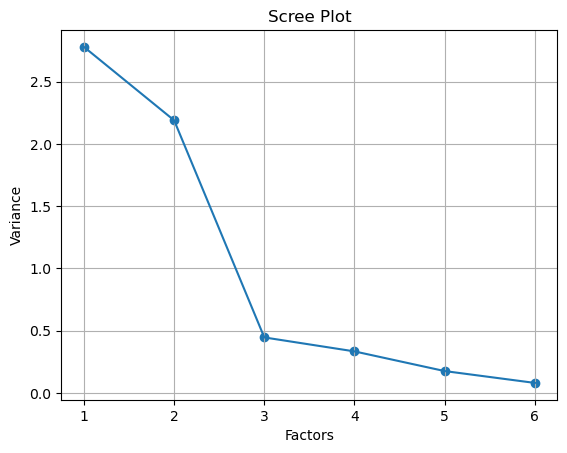

In [22]:
#Scree Plot
x=range(1,7)
myplot.scatter(x,eigen_values)
myplot.plot(x,eigen_values)
myplot.title('Scree Plot')
myplot.xlabel('Factors')
myplot.ylabel('Variance')
myplot.grid()
myplot.show()

In [23]:
#Compute the loadings
#myloadings=mymodel.loadings_
#myloadings=mypd.DataFrame(myloadings)

In [24]:
#myloadings=myloadings.iloc[:,0:2]
#myloadings()

In [25]:
#Final Factor Analysis
mymodel=FactorAnalyzer(n_factors=2,rotation='varimax')

In [26]:
#Fit the model to the data
mymodel=mymodel.fit(myzdata)

In [27]:
#Loadings
myloadings=mymodel.loadings_
myloadings=mypd.DataFrame(myloadings)

In [28]:
round(myloadings,3)

,0,1
0,0.970,-0.045
1,-0.068,0.752
2,0.901,-0.159
3,-0.076,0.765
4,-0.889,-0.050
5,0.055,0.855


In [29]:
#Compute the scores
myscores=mymodel.fit_transform(myzdata)

In [30]:
myscores=mypd.DataFrame(myscores,columns=['Factor1','Factor2'])

In [31]:
myscores.head(25)

,Factor1,Factor2
0,-0.772701,-0.567784
1,1.137412,-0.107893
2,0.121952,1.314105
3,-1.361831,-0.685627
4,0.121952,1.314105
5,-0.772701,-0.567784
6,-1.072162,1.453771
7,-0.390695,1.314192
8,-1.377349,-0.854753
9,0.541235,-0.024837
